In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as soc 
from scipy import constants as const
from scipy import stats
from lmfit import models
from lmfit import Model

In [2]:
#import Oszilloskop daten 
puls1 = np.array(np.genfromtxt("tab/oszilloskop/puls1.csv", delimiter = ",",skip_header=12))
puls2 = np.array(np.genfromtxt("tab/oszilloskop/puls2.csv", delimiter = ",",skip_header=12))
sg1c1 =  np.array(np.genfromtxt("tab/oszilloskop/signalc1.csv", delimiter = ",",skip_header=12))
sg1c3 =  np.array(np.genfromtxt("tab/oszilloskop/s2c3.csv", delimiter = ",",skip_header=12))
sg2c1 =  np.array(np.genfromtxt("tab/oszilloskop/sg3c1.csv", delimiter = ",",skip_header=12))
sg2c3 =  np.array(np.genfromtxt("tab/oszilloskop/sg4c3.csv", delimiter = ",",skip_header=12))

In [3]:
#import first tabel
tlam= np.array(np.genfromtxt("tab/messreihe1.txt", delimiter='&'))
absorption = np.array(np.genfromtxt("tab/absorption.txt", delimiter='&'))
lpow1 = np.array(np.genfromtxt("tab/lpow1.txt", delimiter='&'))
lpow2 = np.array(np.genfromtxt("tab/lpow2.txt", delimiter='&'))
secondp1 = np.array(np.genfromtxt("tab/2ndwave-power.txt", delimiter='&'))
ndpower = np.array(np.genfromtxt("tab/ndyagpower.txt", delimiter='&'))

In [4]:
def linear(x:np.array,m:float,b:float):
    return m*x+b

0.9998407299101856 {'m': 0.31431439325383087, 'b': 797.9283071779096}


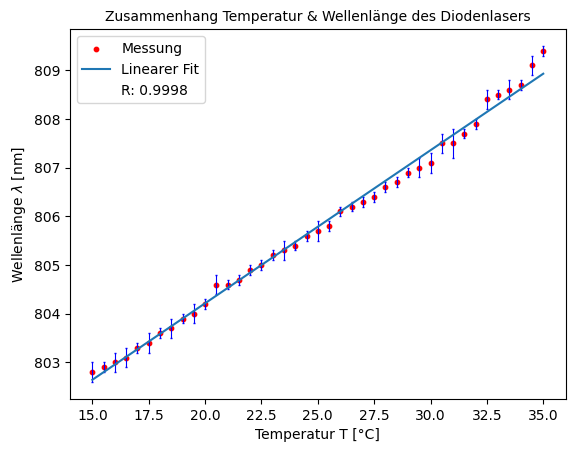

In [5]:
plt.scatter(tlam[:,0],tlam[:,1],s=10,c="red",label="Messung")
plt.errorbar(tlam[:,0],tlam[:,1],yerr=tlam[:,2],linestyle="",capsize=1,c="blue",elinewidth=0.8)

lmodel = Model(linear)
lparam = lmodel.make_params(m = 0.3,b = 800)
lresult = lmodel.fit(tlam[:,1],params=lparam,x = tlam[:,0],weights = tlam[:,2])
plt.plot(tlam[:,0], lresult.best_fit, '-', label='Linearer Fit')
plt.plot([], [], ' ', label="R: "+str(np.round(lresult.rsquared,4)))
print(lresult.rsquared,lresult.best_values)

plt.legend(loc=0)
plt.ylabel(r"Wellenlänge $\lambda$ [nm]")
plt.xlabel(r"Temperatur T [°C]")
plt.title("Zusammenhang Temperatur & Wellenlänge des Diodenlasers",fontsize=10)
plt.savefig("Plots/Temperatur_Wellenlänge_Diode.pdf")

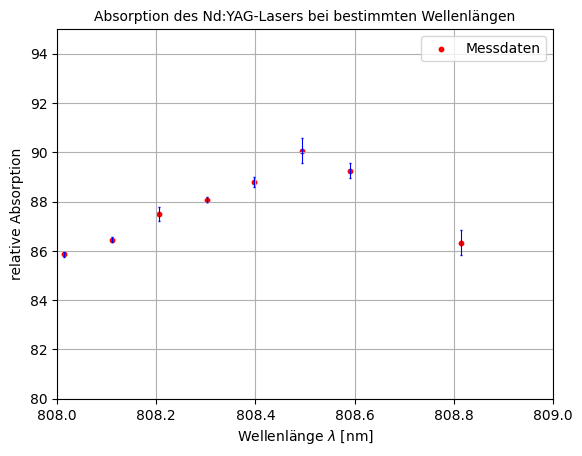

In [6]:
plt.errorbar((0.32*absorption[:,0]+797.87),100-(absorption[:,2]/85.6)*100,yerr=absorption[:,3],linestyle="",capsize=1,c="blue",elinewidth=0.8)
plt.scatter((0.32*absorption[:,0]+797.87),100-(absorption[:,2]/85.6)*100,s=10,c="red",label="Messdaten")
#maxabsorbance = 0.32*(np.max(100-(absorption[:,2]/85.6)*100))+797.87
#plt.plot(tlam[:,0],popt[0]*tlam[:,0]+popt[1],color="orange",label="Linearer Fit: "+str(round(popt[0],2))+"* T + "+str(round(popt[1],5)))
plt.grid(True)
plt.axis([808,809,80,95])
plt.legend(loc=0)
plt.xlabel(r"Wellenlänge $\lambda$ [nm]")
plt.ylabel(r"relative Absorption")
plt.title("Absorption des Nd:YAG-Lasers bei bestimmten Wellenlängen",fontsize=10)
#plt.savefig("Plots/absorptionndyag.pdf")
plt.savefig("Plots/absorptionndyaglimited.pdf")

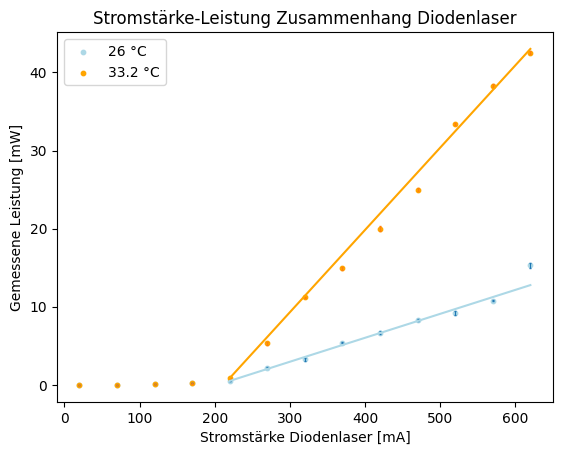

In [7]:
plt.errorbar(lpow1[:,0],lpow1[:,1],yerr=lpow1[:,2],linestyle="",capsize=1,elinewidth=0.8)
plt.scatter(lpow1[:,0],lpow1[:,1],s=10,label="26 °C",c="lightblue")

popt1,cov1 = soc.curve_fit(linear,lpow1[0:9,0],lpow1[0:9,1],sigma=lpow1[0:9,2])
plt.plot(lpow1[0:9,0],popt1[0]*lpow1[0:9,0]+popt1[1],c="lightblue")

plt.errorbar(lpow2[:,0],lpow2[:,1],yerr=lpow2[:,2],linestyle="",capsize=1,elinewidth=0.8)
plt.scatter(lpow2[:,0],lpow2[:,1],s=10,label="33.2 °C",c="orange")

popt2,cov2 = soc.curve_fit(linear,lpow2[4:13,0],lpow2[4:13,1],sigma=lpow2[4:13,2])
plt.plot(lpow2[4:13,0],popt2[0]*lpow2[4:13,0]+popt2[1],c="orange")

plt.xlabel("Stromstärke Diodenlaser [mA]")
plt.ylabel("Gemessene Leistung [mW]")
plt.title("Stromstärke-Leistung Zusammenhang Diodenlaser")
plt.legend()
plt.savefig("Plots/powerup.pdf")

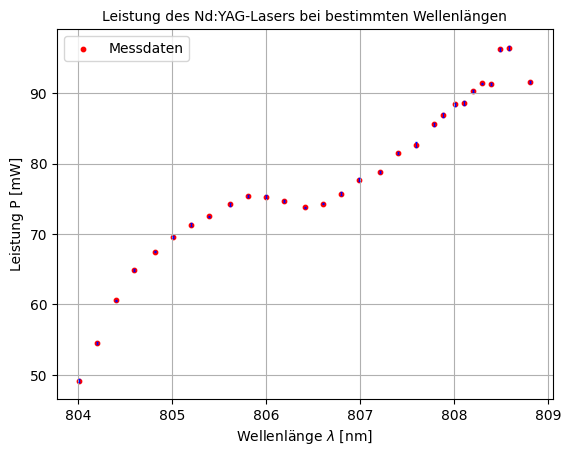

In [8]:
plt.errorbar((0.32*secondp1[:,0]+797.87),secondp1[:,2],yerr=secondp1[:,3],linestyle="",capsize=1,c="blue",elinewidth=0.8)
plt.scatter((0.32*secondp1[:,0]+797.87),secondp1[:,2],s=10,c="red",label="Messdaten")
#maxabsorbance = 0.32*(np.max(100-(absorption[:,2]/85.6)*100))+797.87
#plt.plot(tlam[:,0],popt[0]*tlam[:,0]+popt[1],color="orange",label="Linearer Fit: "+str(round(popt[0],2))+"* T + "+str(round(popt[1],5)))
plt.grid(True)
#plt.axis([808,809,82,98])
plt.legend(loc=0)
plt.xlabel(r"Wellenlänge $\lambda$ [nm]")
plt.ylabel(r"Leistung P [mW]")
plt.title("Leistung des Nd:YAG-Lasers bei bestimmten Wellenlängen",fontsize=10)
#plt.savefig("Plots/absorptionndyag.pdf")
plt.savefig("Plots/wave_power.pdf")

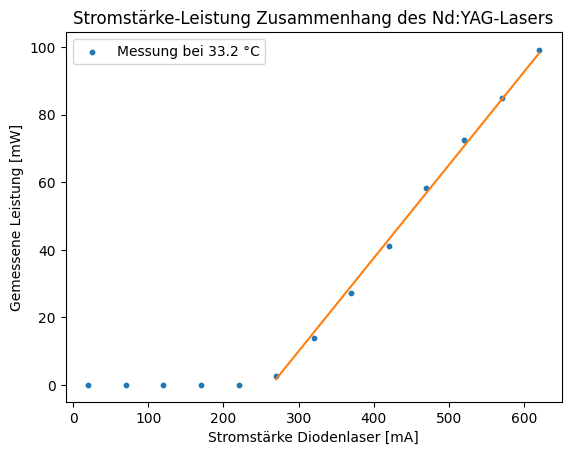

In [9]:
plt.errorbar(ndpower[:,0],ndpower[:,1],yerr=ndpower[:,2],linestyle="",capsize=1,elinewidth=0.8)
plt.scatter(ndpower[:,0],ndpower[:,1],s=10,label="Messung bei 33.2 °C")

popt3,cov3 = soc.curve_fit(linear,ndpower[5:13,0],ndpower[5:13,1],sigma=ndpower[5:13,2])
plt.plot(ndpower[5:13,0],linear(ndpower[5:13,0],*popt3))
plt.xlabel("Stromstärke Diodenlaser [mA]")
plt.ylabel("Gemessene Leistung [mW]")
plt.title("Stromstärke-Leistung Zusammenhang des Nd:YAG-Lasers")
plt.legend()
plt.savefig("Plots/powerupndy.pdf")

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(puls1[::,0]*10**6,puls1[::,1],label="Messdaten",s=1)
#plt.axis([-5,5,0,0.015])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Stromstärke-Leistung Zusammenhang des Nd:YAG-Lasers")
plt.legend(loc=1)
plt.grid(True)
plt.savefig("Plots/osci1.pdf")
plt.show()

In [ ]:
def gaussian(x: np.ndarray,a:float, mu: float, sigma: float,y0:float):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))+y0


Reduziert chi: 8.841606014056623e-07 chiquadrat 0.0012784962296325877
{'a': 0.05625286577694462, 'mu': 0.05908095665639677, 'sigma': 0.04435708966267868, 'y0': 0.006568017715693704} [7.03899069e-05 5.28897968e-05 7.96854194e-05 5.48802689e-05]


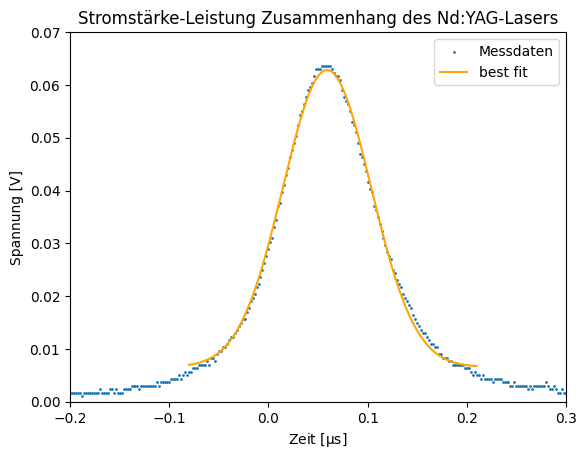

In [ ]:
#plt.figure(figsize=(10,6))
#poptgauss1,covgauss1 = soc.curve_fit(gaussian,puls2[:,0]*10**6,puls2[:,1],method="lm")
#plt.plot(puls2[:,0]*10**6,gaussian(puls2[:,0]*10**6,*poptgauss1),label="Fit")
#stats.chisquare(puls2[:,0]*10**6,gaussian(puls2[:,0]*10**6,*poptgauss1),ddof=1)

plt.scatter(puls2[::10,0]*10**6,puls2[::10,1],label="Messdaten",s=1)

corner1 = 2100
corner2 = 3550

gmodel = Model(gaussian)

# create parameters with initial guesses:
params = gmodel.make_params(a=0.05, mu=0.06, sigma=0.08,y0=0.01)  
result = gmodel.fit(puls2[corner1:corner2,1], params,x=puls2[corner1:corner2,0]*10**6)


plt.plot(puls2[corner1:corner2,0]*10**6, result.best_fit, '-', label='best fit',c="orange")
print("Reduziert chi:",result.redchi,"chiquadrat",result.chisqr)
print(result.best_values,np.sqrt(np.diag(result.covar)))


plt.axis([-2e-1,3e-1,0,0.07])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Stromstärke-Leistung Zusammenhang des Nd:YAG-Lasers")
plt.legend(loc=1)
plt.savefig("Plots/osci2.pdf")
plt.show()

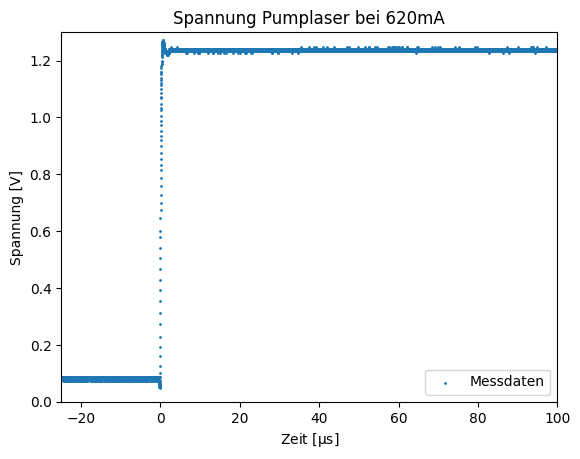

In [ ]:
#plt.figure(figsize=(10,6))
plt.scatter(sg1c1[::40,0]*10**6,sg1c1[::40,1],label="Messdaten",s=1)
plt.axis([-25,100,0,1.3])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Spannung Pumplaser bei 620mA")
plt.legend(loc=0)
plt.savefig("Plots/s1c1.pdf")
plt.show()

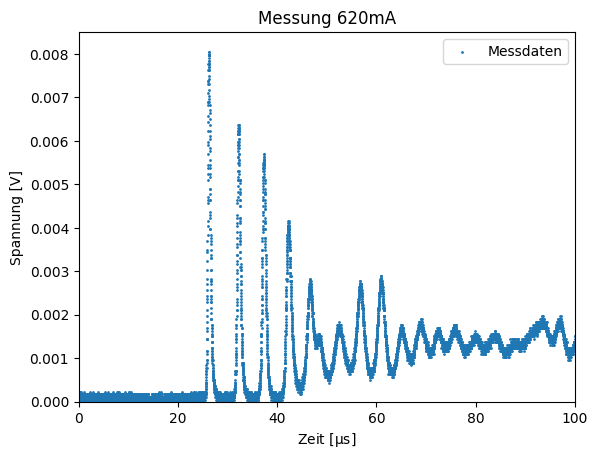

In [ ]:
#plt.figure(figsize=(10,6))
plt.scatter(sg1c3[::40,0]*10**6,sg1c3[::40,1],label="Messdaten",s=1)
plt.axis([0,100,0,0.0085])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Messung 620mA")
plt.legend(loc=1)
plt.savefig("Plots/s1c3.pdf")
plt.show()

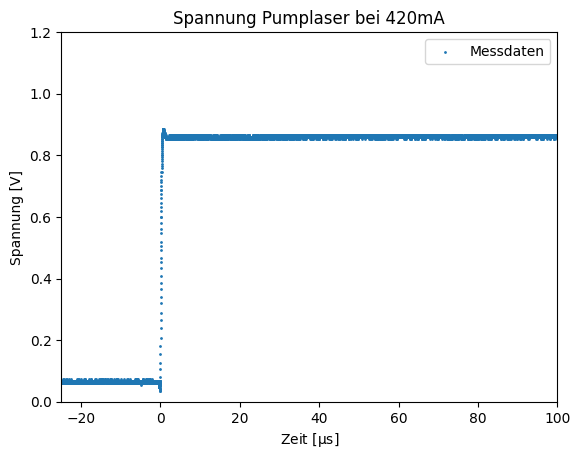

In [ ]:
#plt.figure(figsize=(10,6))
plt.scatter(sg2c1[::40,0]*10**6,sg2c1[::40,1],label="Messdaten",s=1)
plt.axis([-25,100,0,1.2])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Spannung Pumplaser bei 420mA")
plt.legend(loc=1)
plt.savefig("Plots/s2c1.pdf")
plt.show()

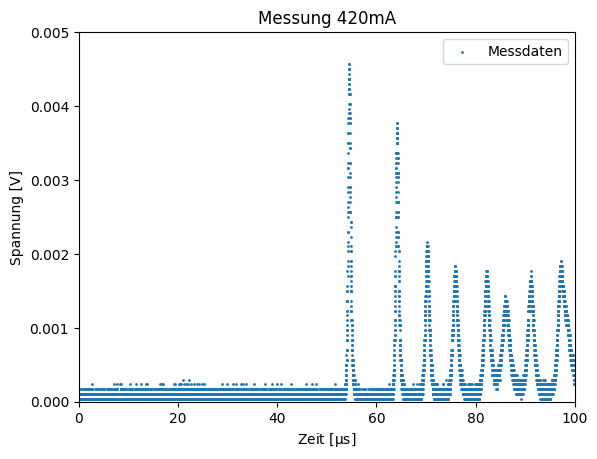

In [ ]:
#plt.figure(figsize=(10,6))
plt.scatter(sg2c3[::40,0]*10**6,sg2c3[::40,1],label="Messdaten",s=1)
plt.axis([0,100,0,0.005])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$")
plt.ylabel("Spannung [V]")
plt.title("Messung 420mA")
plt.legend(loc=1)
plt.savefig("Plots/s2c3.pdf")
plt.show()